# Chapter 7

In [10]:
#imports
import numpy as np
from graphviz import Digraph
from graphviz import Graph
import random
from IPython.display import Image

## TBD Horspool's

## TBD Boyer-Moore

## Hash Tables

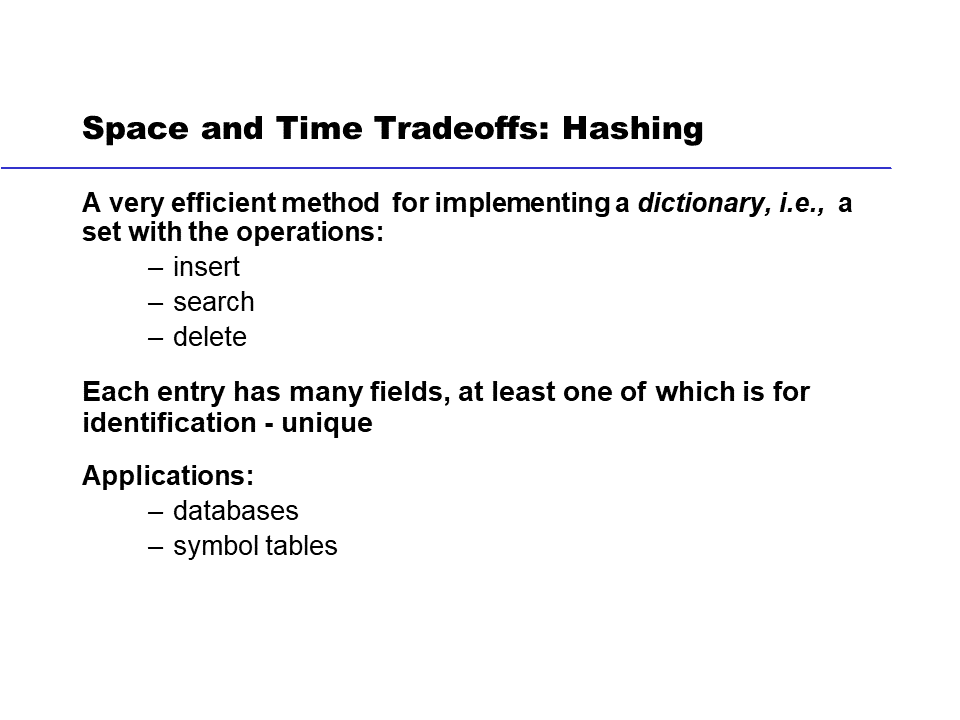

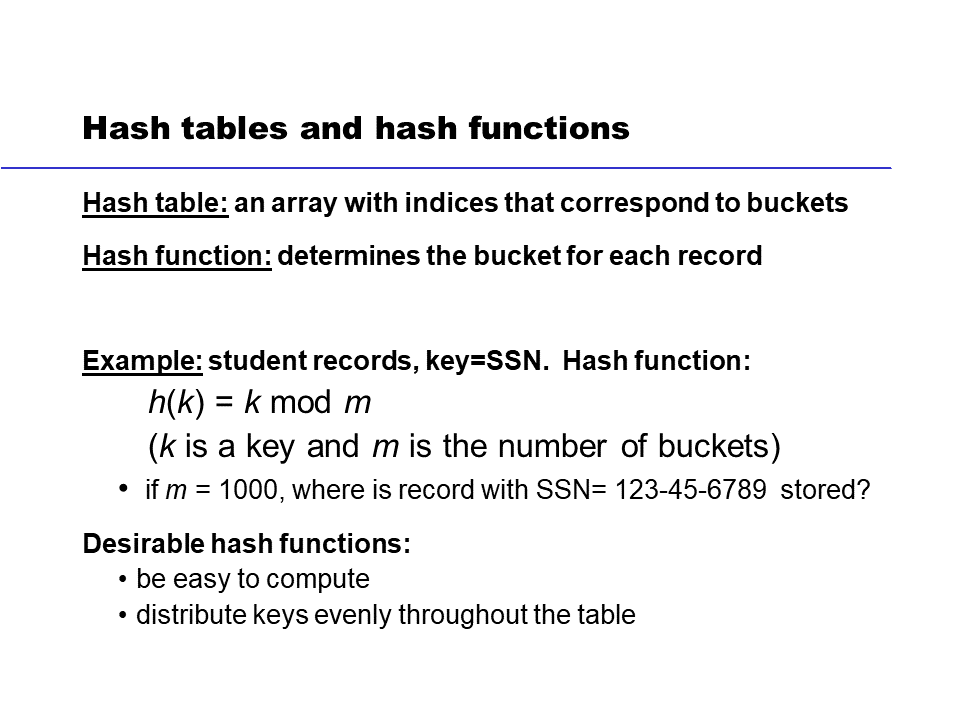

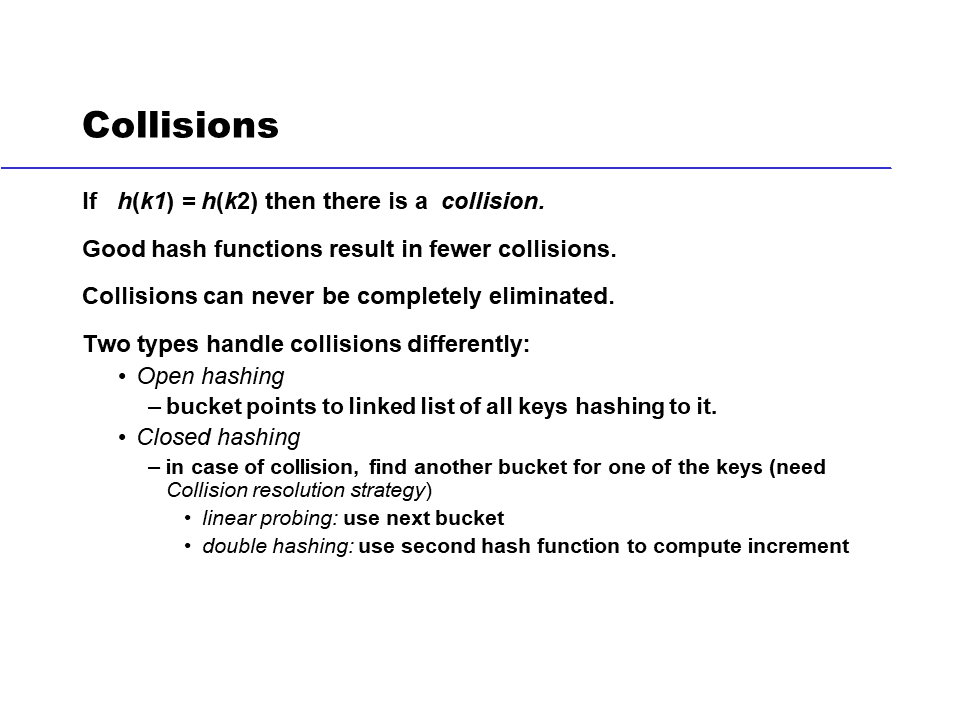

In [11]:
class open_hash_table_basic:
    def __init__(self,n):
        self.table=[None for i in range(n)]
        self.size=n
    
    """
    Input: a number 'item'. It will be hashed to bucket item % htable size
    Output: None
    """
    def insert(self,item):
        h = item % self.size
        if self.table[h] is None:
            self.table[h] = [item]
        else:
            self.table[h].append(item)
        
        
def draw_open_ht(ht):
    dot = Digraph("Open Hash Table", node_attr={'shape': 'plaintext'})
    
    ht_struct = '''< <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"> <TR> '''  
    for i in range(ht.size):
        ht_struct = ht_struct + '''<TD >'''+str(i)+ '''</TD>'''
    ht_struct = ht_struct + '''<TD>=indices</TD></TR><TR>'''
    
    for i in range(ht.size):
        ht_struct = ht_struct + '''<TD PORT="i'''+str(i)+'''"> </TD>'''
    ht_struct = ht_struct + '''</TR></TABLE> >'''
    dot.node('ht_struct',ht_struct)
    
    for i in range(ht.size):
        if ht.table[i] is not None:
            ll_struct = '''< <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"> <TR> '''    
            for j in range(len(ht.table[i])):
                ll_struct = ll_struct + '''<TD PORT="i'''+str(i)+'''j'''+str(j)+'''">'''+str(ht.table[i][j])+''' </TD>'''
            ll_struct = ll_struct + '''</TR></TABLE> >'''
            dot.node('ll_struct'+str(i),ll_struct)
            dot.edge('ht_struct:i'+str(i),'ll_struct'+str(i)+':i'+str(i)+'j0')
    display(dot)

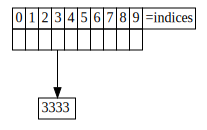

In [12]:
ht = open_hash_table_basic(10)
ht.insert(3333)
draw_open_ht(ht)

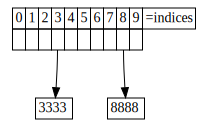

In [13]:
ht.insert(8888)
draw_open_ht(ht)

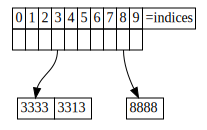

In [14]:
ht.insert(3313)
draw_open_ht(ht)

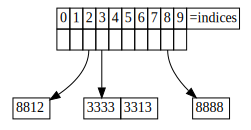

In [15]:
ht.insert(8812)
draw_open_ht(ht)

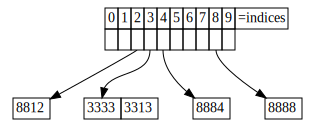

In [16]:
ht.insert(8884)
draw_open_ht(ht)

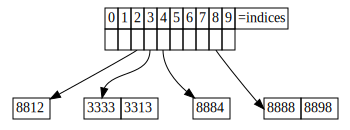

In [17]:
ht.insert(8898)
draw_open_ht(ht)

### Closed Hash Table
Okay, I'm going to draw these vertically and also in a form more compatible with key-value pairs (but will follow the handout more or less). This is more in line with the **Dictionary ADT** use of a hash table.

In [19]:
class closed_hash_table:
    def __init__(self,n,collision_strategy):
        self.table=[None for i in range(n)]
        self.size=n
        self.strategy = collision_strategy
        self.num_items = 0
        self.grave_marker = "grave_marker"
        
    def get_hash(self,key):
        return key % self.size
    
    """
    Input: a number 'item'. It will be hashed to bucket item % htable size
    Output: None
    """
    def insert(self,pair):
        key = pair[0]
        #value = pair[1]
        
        if self.num_items + 1 > self.size and self.search(pair[0]) is None: 
            #check if in H.T.
            raise RuntimeError('Hash Table is Full -- Insert Failed')
            
        gen = self.strategy.get_generator(self,key)
        for i in gen:
            print('probed ' + str(i))
            if self.table[i] is None or self.table[i] is self.grave_marker:
                self.num_items += 1
                self.table[i] = pair
                break
            if self.table[i][0] == key: #REPLACE the value
                self.table[i] = pair
                break
                
    def search(self,key):
        gen = self.strategy.get_generator(self,key)
        ct = 0
        for i in gen:
            ct += 1
            print('probed ' + str(i))
            if self.table[i] is None:
                return None
            if self.table[i] is self.grave_marker:
                continue
            if self.table[i][0] == key: #REPLACE the value
                return self.table[i][1]
            if ct == self.size:
                return None
    
    def delete(self,key):
        gen = self.strategy.get_generator(self,key)
        ct = 0
        for i in gen:
            ct += 1
            print('probed ' + str(i))
            if self.table[i] is None:
                return False
            if self.table[i] is self.grave_marker:
                continue
            if self.table[i][0] == key: #REPLACE the value
                self.table[i] = self.grave_marker
                self.num_items -= 1
                return True
            if ct == self.size:
                return False
            
            
class linear_probing:
    def __init__(self):
        pass
    
    class lin_probe(object):
        def __init__(self,cht,key):
            self.cht = cht
            self.hash = cht.get_hash(key)
            self.i = -1
            
        def __iter__(self):
            return self   
        
        def __next__(self):
            return self.next()
        
        def next(self):
            self.i += 1
            return (self.hash+self.i)%self.cht.size
            
            
    def get_generator(self,cht, key):
        return self.lin_probe(cht,key)
    

def draw_closed_ht(cht):
    dot = Digraph("Closed Hash Table", node_attr={'shape': 'plaintext'})
    
    ht_struct = '''< <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"> 
      <TR> <TD> index </TD><TD> value</TD></TR>'''  

    
    for i in range(cht.size):
        ht_struct = ht_struct + '''<TR><TD>'''+str(i)+''' </TD>'''
        ht_struct = ht_struct + '''<TD>'''+str(cht.table[i])+'''</TD></TR>'''
    
    ht_struct = ht_struct + '''</TABLE> >'''
    dot.node('ht_struct',ht_struct)
    

    display(dot)   

probed 3


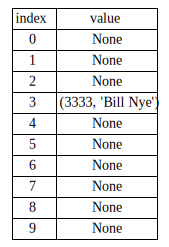

In [21]:
cht = closed_hash_table(10,linear_probing() )

cht.insert ( (3333,"Bill Nye") )

draw_closed_ht(cht)

probed 8


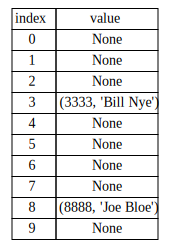

In [23]:
cht.insert ( (8888,"Joe Bloe") )

draw_closed_ht(cht)



probed 3
probed 4


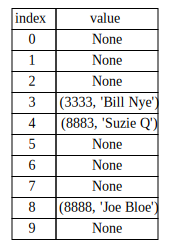

In [25]:
cht.insert ( (8883,"Suzie Q") )

draw_closed_ht(cht)

probed 2


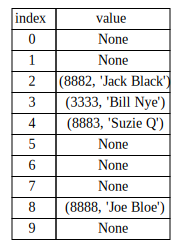

In [26]:
cht.insert ( (8882,"Jack Black") )

draw_closed_ht(cht)

probed 4
probed 5


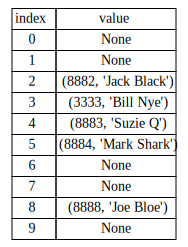

In [28]:
cht.insert ( (8884,"Mark Shark") )

draw_closed_ht(cht)

probed 8
probed 9


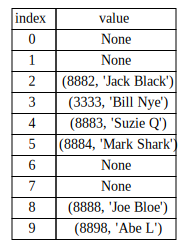

In [29]:
cht.insert ( (8898,"Abe L") )

draw_closed_ht(cht)

probed 8
probed 9
probed 0


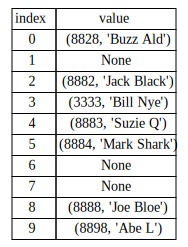

In [30]:
cht.insert ( (8828,"Buzz Ald") )

draw_closed_ht(cht)

probed 2
probed 3
probed 4
probed 5
probed 6


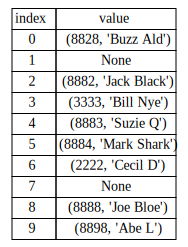

In [32]:
cht.insert ( (2222,"Cecil D") )

draw_closed_ht(cht)

checking overriting...

probed 8
probed 9
probed 0


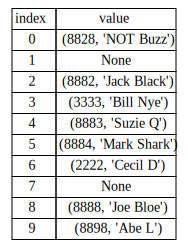

In [33]:
cht.insert ( (8828,"NOT Buzz") )

draw_closed_ht(cht)

Now, break it:

probed 8
probed 9
probed 0
probed 1


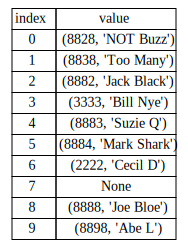

In [34]:
cht.insert ( (8838,"Too Many") )

draw_closed_ht(cht)

probed 8
probed 9
probed 0
probed 1
probed 2
probed 3
probed 4
probed 5
probed 6
probed 7


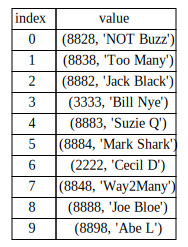

In [35]:
cht.insert ( (8848,"Way2Many") )

draw_closed_ht(cht)

probed 8
probed 9
probed 0
probed 1
probed 8
probed 9
probed 0
probed 1


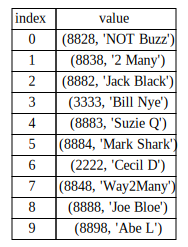

In [36]:
#check overwrite when full (really bad to have full HT but...)
cht.insert ( (8838,"2 Many") )

draw_closed_ht(cht)

In [37]:
#now, insert into full -- should throw RuntimeError
cht.insert ( (0000,"Oh Noes") )

draw_closed_ht(cht)

probed 0
probed 1
probed 2
probed 3
probed 4
probed 5
probed 6
probed 7
probed 8
probed 9


RuntimeError: Hash Table is Full -- Insert Failed

Also, notice the number of collisions increased as $\alpha$, the load factor increases.

$\alpha = \frac{\text{number of items}}{\text{size of table}}$


#### Deletion
Deletion requires a special marker to know when an item has been removed. This affects:
- searching (just keep going) 
- insertion (just overwrite grave_marker)
- deletion itself (deletion follows a search)





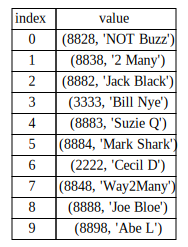

In [38]:
draw_closed_ht(cht)

probed 3


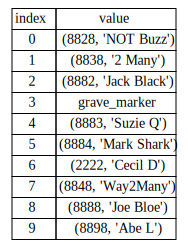

In [39]:
cht.delete(3333)
draw_closed_ht(cht)

probed 3
probed 4


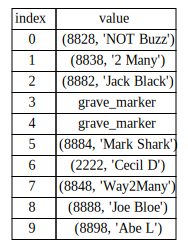

In [40]:
cht.delete(8883)
draw_closed_ht(cht)

Cleaning things up and restarting....

probed 3
probed 8
probed 3
probed 4
probed 2
probed 4
probed 5
probed 8
probed 9


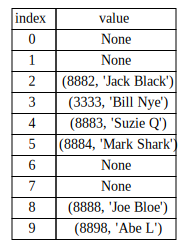

In [41]:
cht = closed_hash_table(10,linear_probing() )

cht.insert ( (3333,"Bill Nye") )
cht.insert ( (8888,"Joe Bloe") )
cht.insert ( (8883,"Suzie Q") )
cht.insert ( (8882,"Jack Black") )
cht.insert ( (8884,"Mark Shark") )
cht.insert ( (8898,"Abe L") )
draw_closed_ht(cht)

probed 3


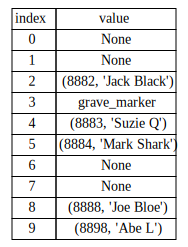

In [42]:
cht.delete(3333)
draw_closed_ht(cht)

probed 3
probed 4


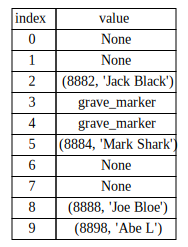

In [43]:
cht.delete(8883)
draw_closed_ht(cht)


probed 2
probed 3


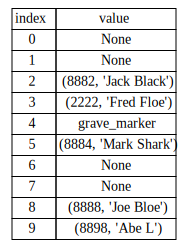

In [44]:
cht.insert( (2222, "Fred Floe"))
draw_closed_ht(cht)

#### Double Hashing
Add some other some other number as an increment (hash it with *another* hash $s(k)$ function that returns a number $1< s(k)<m$, where m is the table size).

Your book suggests several possibilities but we will 
- make $m==11$
- $s(k) = k - k \mod 8$

Defining the double_hashing_strategy:

In [45]:
class double_hashing_strategy:
    def __init__(self):
        pass
    
    class double_hash_probe(object):
        def __init__(self,cht,key):
            self.cht = cht
            self.hash = cht.get_hash(key)
            self.sk = 8 - key % 8 
            self.i = -1
            
        def __iter__(self):
            return self   
        
        def __next__(self):
            return self.next()
        
        def next(self):
            self.i += 1
            return (self.hash+self.i*self.sk)%self.cht.size
            
            
    def get_generator(self,cht, key):
        return self.double_hash_probe(cht,key)

probed 0


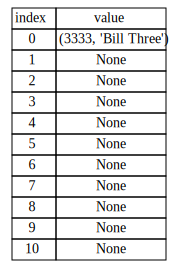

In [46]:
#we want a prime number here
cht = closed_hash_table(11,double_hashing_strategy() )

cht.insert ( (3333,"Bill Three") ) #303*11

draw_closed_ht(cht)

probed 0
probed 8


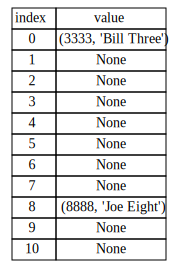

In [47]:
cht.insert ( (8888,"Joe Eight") ) #808*11

draw_closed_ht(cht)

probed 0
probed 7


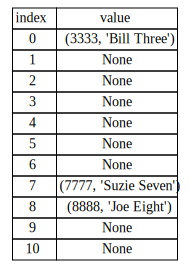

In [48]:

cht.insert ( (7777,"Suzie Seven") ) #... see above

draw_closed_ht(cht)

probed 0
probed 6


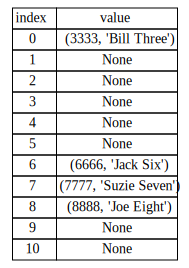

In [49]:

cht.insert ( (6666,"Jack Six") )

draw_closed_ht(cht)

probed 0
probed 4


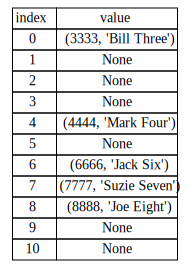

In [50]:
cht.insert ( (4444,"Mark Four") )

draw_closed_ht(cht)

probed 0
probed 5


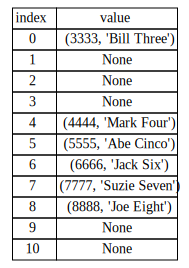

In [51]:
cht.insert ( (5555,"Abe Cinco") )
draw_closed_ht(cht)

Pros and cons of Double Hashing
- Pro: Double Hashing "spreads out" when there are clusters, though ultimately fails as $a$ gets too large
- Con: Double Hashing does not take advantage of "spatial locality", i.e. the accesses to memory in a large table are likely to cause *cache misses* and have significant penalties
- (Linear Probing is basically the opposite for each)

Is there a middle ground? Yes, **quadratic probing** starts with a small increment and grows.

In [52]:
class quadratic_probing:
    def __init__(self):
        pass
    
    class quadratic_probe(object):
        def __init__(self,cht,key):
            self.cht = cht
            self.hash = cht.get_hash(key)
            self.i = -1
            
        def __iter__(self):
            return self   
        
        def __next__(self):
            return self.next()
        
        def next(self):
            self.i += 1
            return (self.hash+self.i*self.i)%self.cht.size
            
            
    def get_generator(self,cht, key):
        return self.quadratic_probe(cht,key)

probed 0


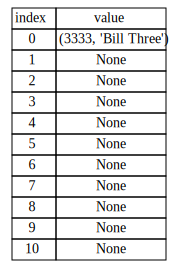

In [53]:
cht = closed_hash_table(11,quadratic_probing() )

cht.insert ( (3333,"Bill Three") ) #303*11

draw_closed_ht(cht)

probed 0
probed 1


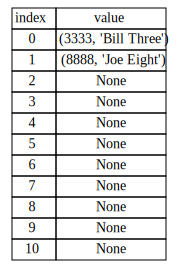

In [54]:
cht.insert ( (8888,"Joe Eight") ) #808*11

draw_closed_ht(cht)


probed 0
probed 1
probed 4


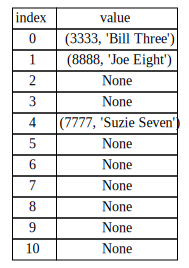

In [55]:
cht.insert ( (7777,"Suzie Seven") ) #... see above

draw_closed_ht(cht)

probed 0
probed 1
probed 4
probed 9


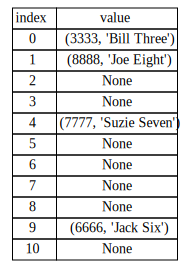

In [56]:
cht.insert ( (6666,"Jack Six") )

draw_closed_ht(cht)

probed 0
probed 1
probed 4
probed 9
probed 5


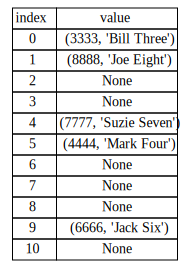

In [57]:
cht.insert ( (4444,"Mark Four") )

draw_closed_ht(cht)

probed 0
probed 1
probed 4
probed 9
probed 5
probed 3


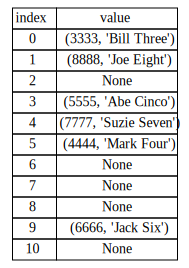

In [58]:
cht.insert ( (5555,"Abe Cinco") )
draw_closed_ht(cht)

#### Hash Tables and Ch 6 Problems
Python dictionaries are hash tables and extremely useful.

##### HT for (Repeated) Searching of an array

In [59]:
def list2dict(ns):
    return { n:None for n in ns} #dictionary expects key value pairs
    
    
def search_dict(dictns,n):
    if n in dictns:
        return True
    else:
        return False

def rand_list(ct,start=0,step=1): #copied from ch6
    xs = [x for x in range(start,start+ct*step,step)]
    random.shuffle(xs)
    return xs

In [60]:
ns = rand_list(20,0)
dictns = list2dict(ns)
print("searching for 10 is "+ str(search_dict(dictns,10)) )
print("searching for 99 is "+ str(search_dict(dictns,99)) )

searching for 10 is True
searching for 99 is False


Okay, perhaps not obviously impressive but:
- Insertion is $O(1)$, *average case*, done $O(n)$ times
- Look up (search) is average case $O(1)$
- So, this is average case $0(\mathbf n)$. How does this compare to sequential search, also $O(n)$.
    - Well sequential search is *worst* case $O(n)$
    - But the Hash Table approach is *same average order of growth* and we get something that makes future searches average case $O(1)$
    - We can add or delete to the Hash table, each item $O(1)$, and this makes repeated searches *much faster*.
- What am I not telling you -- i.e. what's missing here?

#### Rehashing
Okay, so what happens when the table begins to fill up in a Python dict/ most other library hash tables? We just go through and *rehash* everything. Seem expensive? It's not, really. Do really do this we need **amortized analysis** but let me argue it in a way that might convince you, with successive *careful* overapproximations.

Assume we insert $n$ items into a hash table, initial size 1, and just double the hash table size every time we reach 50% capacity or greater. For any $n$, let's just look at the *next* power of 2 $n^{th}$ item g.t.o.e to it, i.e. $n$ a power of $2$, $2^k, k\in \mathbb{N}$ which will force the table to *be rehashed*. This will be our first careful overapproximation since the next power of $2$ for every number $n\leq2^k\leq 2n$, where $2^k$ is the next largest power of 2 (if $n$ is a power of 2 then $n=2^k$). So, the cost of our overapproximation (in increasing the problem size) is bounded from above by $2$, a *constant* so let's just call it 2.

If $n$ is a power of 2, and we reallocate on every power of two then let's just count the allocate/hash/copy costs *for each item* in total. This is also an over approximation, since when we allocate the $n=2\times 2^k$item hash table, half of the table is empty and does not require copying or hashing (just the spot in memory needs to be allocated now). If you draw it you get something like the following.

Notes:

- The item to be inserted is the rightmost of the *second* to last row. The bottom row is the copy/allocate/hash for all the items.
- This translates to a sum of the form $A(n) \approx \Sigma^{\lceil log_2 n\rceil}_{i=0} 2^i = 2^{\log_2 n+1} -1 = 2n -1 \in O(n)$

In [2]:
from  termcolor import colored

row1 = [1]
row2 = [1,1]
row3 = [1,1,1,1]
row4 = [1 for i in range(8)]
row5 = [1 for i in range(16)]
print(colored(row1,'yellow'))
print(colored(row2,'green'))
print(colored(row3,'cyan'))
print(colored(row4,'blue'))
print(colored(row5,'red'))

[1]
[1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


but we can also draw the above like

In [4]:
print(colored(row1,'yellow'),end = '')
print(colored(row2,'green'),end = '')
print(colored(row3,'cyan'),end = '')
print(colored(row4,'blue'))
print(colored(row5,'red'))

[1][1, 1][1, 1, 1, 1][1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


So, we end up with a constant factor about 4 to 8 when rehashing versus if we just preallocated the hashtable (plus some cushion -- only possible if we know table size at beginning anyway). Inserting $n$ items is $\Omega(n)$, obviously.

The range from "about 4 to 8" is from the "next power of two approximation" of $n$
- if $n$ *is* a power of two then there is no overapproximation
- if $n$ is, e.g. $2^k + 1, k\in \mathbb{N}$, then it is closer to 8.

*But that is still just a constant*

**NOTE: this does *not* mean all insertions take O(1) time but, rather, on *average* they do.**
- most insertions that do happen take $O(1)$ time
- the ones that cause rehashing take $O(n)$ time

This is a really important idea I wish we had time to explore. It's the key insight to understand the benefits (and drawbacks) of:
- Java ArrayList
- C++ vector
- Python Lists, []
- and any other **dynamic array**

(Note: *Deletion* has to be delayed )

Does this work for 
- finding a repeated elemement/duplicate in an array?
- $k^{th}$ order-statistic?
- finding the *mode*?